# Short Test 2 (Sem B)
## **Question 1**
Consider an Ornstein-Uhlenbeck process V(t)

with $k = 3$ and $V (0) = -0.5$.

Determine using your own numerical algorithm the average time it takes to reach $1.35$ for the first time (2 significant figures). I.e., at what time does it reach a value that is equal to or larger than $1.35$.

### **Part A**: Determine the time it takes for a single walker (single process), $\tau_i$.
From lectures, we have that the numerical scheme for the Ornstein-Uhlenbeck process is
$$\begin{align*}
&V(t+\Delta t)-V(t)=\sqrt{\Delta t}Z(t)-kV(t)\Delta t\\
\Rightarrow &V(t+\Delta t)=(1-k\Delta t)V(t)+\sqrt{\Delta t}Z(t)
\end{align*}$$

In [168]:
import numpy as np
import matplotlib.pyplot as plt

'''PARAMS'''
time, tstep = 100, 0.1
mu, sigma = 0, 1
k=3

Creating an array $V(t): t\in [0,40]$

In [169]:
V = np.zeros((round(time/tstep),))
V[0] = -0.5

Generate random numbers of the variable $Z(t)$, plot the result to ensure distribution approximates a Gaussian.

(array([0.00652395, 0.03751271, 0.1418959 , 0.21202835, 0.3343524 ,
        0.42405671, 0.25443402, 0.15983676, 0.04729863, 0.0130479 ]),
 array([-3.14153845, -2.5284129 , -1.91528735, -1.30216181, -0.68903626,
        -0.07591071,  0.53721484,  1.15034038,  1.76346593,  2.37659148,
         2.98971702]),
 <BarContainer object of 10 artists>)

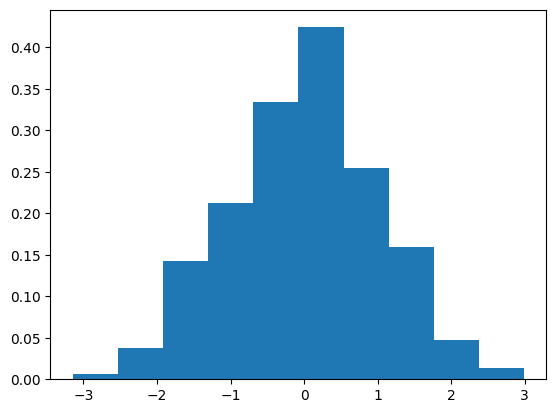

In [170]:
Z = np.random.normal(mu, sigma, round(time/tstep))
plt.hist(Z, 10, density=True)

We now fill in our values for the function, now shown in index form
$$
V_{i+1}=(1-k\Delta t)V_i+\sqrt{\Delta t}Z_i
$$

In [171]:
'''ORNSTEIN-UHLENBECK PROCESS'''
def ornsteinUhlenbeck(V,time,tstep,k):
    sqrtTStep = np.sqrt(tstep)
    for i in range(1,round(time/tstep)):
        V[i] = 1-(k*tstep)
        V[i] *= V[i-1]
        V[i] += sqrtTStep*Z[i-1]
    return V
V = ornsteinUhlenbeck(V,time,tstep,k)

Creating a plot of V(t) against time.

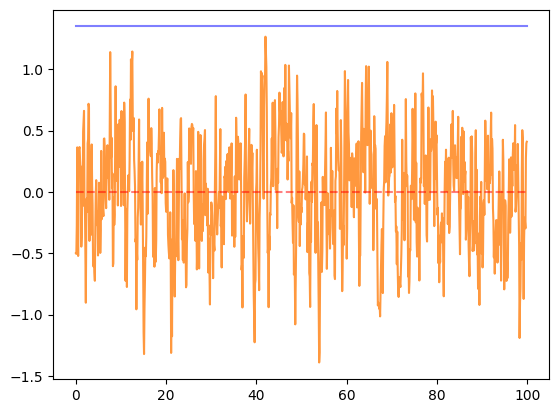

In [172]:
'''PLOTTING'''
fig, ax = plt.subplots()
T = np.arange(0, time, tstep)
ax.plot(T, V, color="C1", alpha=0.8, linestyle='-')
ax.plot(T, T*0, color="r", alpha=0.5, linestyle='--', label=r'$Mean$')
ax.plot(T, np.full((round(time/tstep),), 1.35), color="b", alpha=0.5, linestyle='-', label=r'$V(t)=1.35$')

Identify any values that meet $V(t)\geq 1.35$.

(-3.0, 3.0)

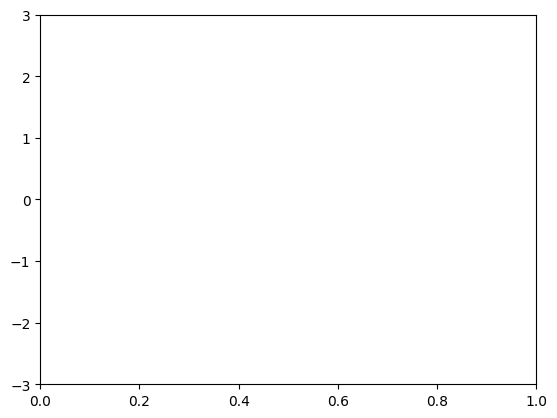

In [173]:
for i in range(V.shape[0]):
    if(V[i]>=1.35):
        ax.scatter(i, V[i], color="r", marker='x', label='')
        print(V[i],i)
ax.set_title('Solving the diffusion equation.')
ax.set_xlabel(r'$Time, t$')
ax.set_ylabel(r'$V(t)$')
ax.legend(loc="upper right")
plt.ylim(-3,3)

## *Question 2*
Now take the average over many walkers (multiple processes), $\tau=\langle\tau_i\rangle$. The amount of walkers and timestep should be chosen, such that the answer is accurate to at least two significant figures.
